In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report
import pickle
import warnings
warnings.filterwarnings('ignore')

In [146]:
df=pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [147]:
# EDA,PREPROCESSING,FEATURE ENGINEERING

df=df.set_index('PassengerId')

In [148]:
df=df.drop(['Ticket','Name'],axis=1)

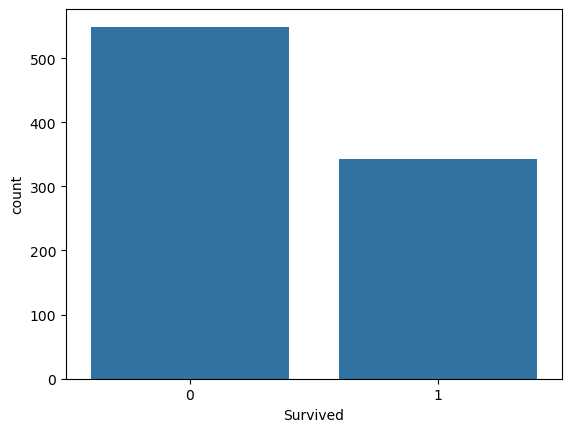

In [149]:
## chack balanced or not
sns.countplot(x='Survived',data=df)
plt.show()

In [150]:
df.duplicated().sum()

107

In [151]:
df.drop_duplicates(inplace=True)

In [152]:
df.duplicated().sum()

0

In [153]:
((df.isnull().sum()/len(df))*100).sort_values(ascending=False)

Cabin       74.107143
Age         13.520408
Embarked     0.255102
Survived     0.000000
Pclass       0.000000
Sex          0.000000
SibSp        0.000000
Parch        0.000000
Fare         0.000000
dtype: float64

In [154]:
df.drop('Cabin',axis=1,inplace=True)

In [155]:
df.Age.skew()

0.3674542095476674

In [156]:
df.Age.fillna(df.Age.median(),inplace=True)


In [157]:
df.Embarked.fillna(df.Embarked.mode()[0],inplace=True)

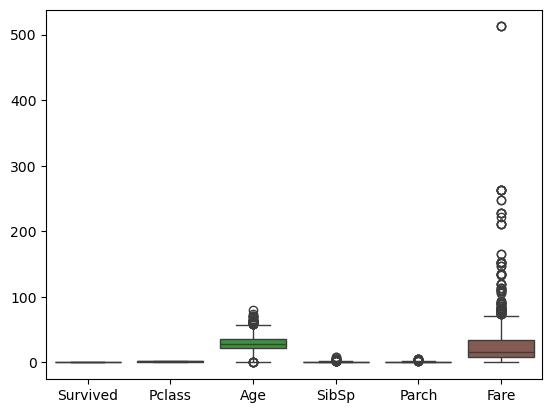

In [158]:
sns.boxplot(df)
plt.show()

In [159]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [160]:
df1=['Age','SibSp','Parch','Fare']

In [161]:
for i in df1:
    q1=np.percentile(df[i],25,method='midpoint')
    q3=np.percentile(df[i],75,method='midpoint')
    iqr=q3-q1
    low_lim=q1-1.5*iqr
    upp_lim=q3+1.5*iqr
    df[i]=df[i].clip(lower=low_lim,upper=upp_lim)

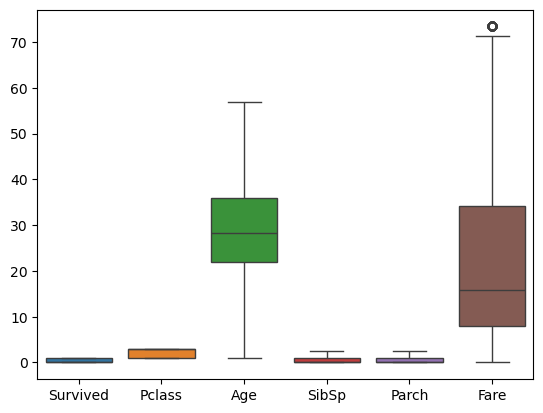

In [162]:
sns.boxplot(df)
plt.show()

In [163]:
# encoding

df=pd.get_dummies(df).astype(int)

In [164]:
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,
1,0,3,22,1,0,7,0,1,0,0,1
2,1,1,38,1,0,71,1,0,1,0,0
3,1,3,26,0,0,7,1,0,0,0,1
4,1,1,35,1,0,53,1,0,0,0,1
5,0,3,35,0,0,8,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,3,39,0,2,29,1,0,0,1,0
888,1,1,19,0,0,30,1,0,0,0,1
889,0,3,28,1,2,23,1,0,0,0,1


<Axes: >

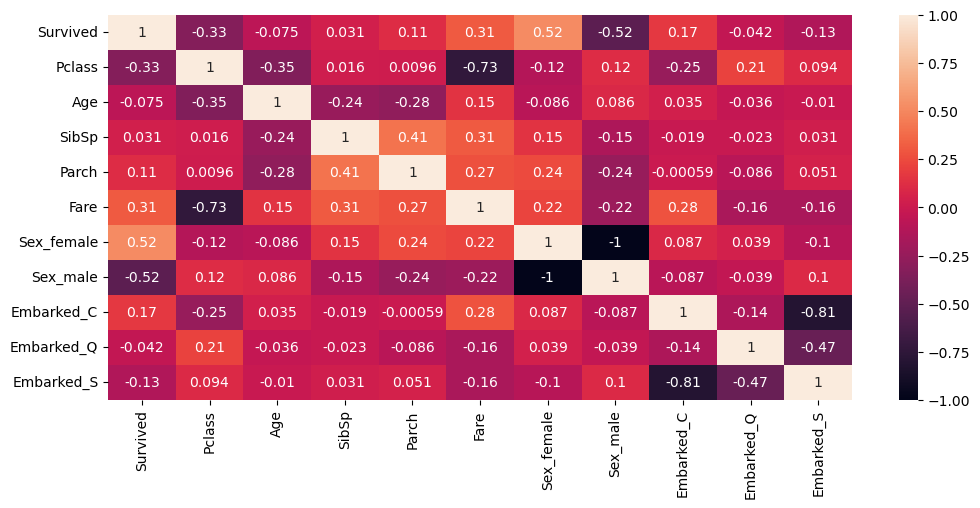

In [165]:
# corr
plt.figure(figsize=(12,5))
sns.heatmap(df.corr(),annot=True)

In [166]:
df.drop(['Embarked_S','Fare'],axis=1,inplace=True)

In [167]:
y=df.Survived.values.reshape(-1,1)
x=df.drop('Survived',axis=1)

In [168]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [169]:
log=LogisticRegression()
log_model=log.fit(x_train,y_train)
log_pred=log_model.predict(x_test)

In [170]:
metrics=['train accuracy','test accuracy','precision','recall','f1 score']
table=pd.DataFrame([[log.score(x_train,y_train)],[accuracy_score(y_test,log_pred)],[precision_score(y_test,log_pred)],[recall_score(y_test,log_pred)],[f1_score(y_test,log_pred)]],columns=['log'])
table.index=metrics
table

,log
train accuracy,0.776715
test accuracy,0.777070
precision,0.757576
recall,0.724638
f1 score,0.740741


In [171]:
print(classification_report(y_test,log_pred))

              precision    recall  f1-score   support

           0       0.79      0.82      0.80        88
           1       0.76      0.72      0.74        69

    accuracy                           0.78       157
   macro avg       0.77      0.77      0.77       157
weighted avg       0.78      0.78      0.78       157



In [172]:
rf=RandomForestClassifier()
rf_model=rf.fit(x_train,y_train)
rf_pred=rf_model.predict(x_test)

In [173]:
metrics=['train accuracy','test accuracy','precision','recall','f1 score']
table=pd.DataFrame([[rf.score(x_train,y_train)],[accuracy_score(y_test,rf_pred)],[precision_score(y_test,rf_pred)],[recall_score(y_test,rf_pred)],[f1_score(y_test,rf_pred)]],columns=['random forest'])
table.index=metrics
table

,random forest
train accuracy,0.934609
test accuracy,0.802548
precision,0.839286
recall,0.681159
f1 score,0.752000


In [174]:
#hyper parameter tuning

In [175]:
param_grid={'penalty':['l1', 'l2', 'elasticnet' ],
           'C':[0.1,0.2,0.3],
           'class_weight':['balanced',None]}
log_cv=GridSearchCV(log,param_grid)
log_cv.fit(x_train,y_train)
log_cv.best_params_

{'C': 0.1, 'class_weight': None, 'penalty': 'l2'}

In [176]:
log=LogisticRegression(C=0.1,class_weight=None,penalty='l2')
log_model=log.fit(x_train,y_train)
log_pred=log_model.predict(x_test)

In [177]:
metrics=['train accuracy','test accuracy','precision','recall','f1 score']
table=pd.DataFrame([[log.score(x_train,y_train)],[accuracy_score(y_test,log_pred)],[precision_score(y_test,log_pred)],[recall_score(y_test,log_pred)],[f1_score(y_test,log_pred)]],columns=['log'])
table.index=metrics
table

,log
train accuracy,0.783094
test accuracy,0.802548
precision,0.827586
recall,0.695652
f1 score,0.755906


In [178]:
print(classification_report(y_test,log_pred))


              precision    recall  f1-score   support

           0       0.79      0.89      0.83        88
           1       0.83      0.70      0.76        69

    accuracy                           0.80       157
   macro avg       0.81      0.79      0.80       157
weighted avg       0.81      0.80      0.80       157



In [179]:
param_grid={'n_estimators':[24,50,100,120],
           'max_depth':[3,6,9],
           'max_leaf_nodes':[3,6,9],
           'max_features':['sqrt','log2',None]}
rf_cv=GridSearchCV(rf,param_grid)
rf_cv.fit(x_train,y_train)
rf_cv.best_params_

{'max_depth': 6,
 'max_features': 'sqrt',
 'max_leaf_nodes': 9,
 'n_estimators': 120}

In [180]:
rf=RandomForestClassifier(n_estimators=24,max_leaf_nodes= 6,max_features='log2',max_depth=6)
rf.fit(x_train,y_train)
rf_pred=rf.predict(x_test)

In [181]:
metrics=['train accuracy','test accuracy','precision','recall','f1 score']
table=pd.DataFrame([[rf.score(x_train,y_train)],[accuracy_score(y_test,rf_pred)],[precision_score(y_test,rf_pred)],[recall_score(y_test,rf_pred)],[f1_score(y_test,rf_pred)]],columns=['random forest'])
table.index=metrics
table

,random forest
train accuracy,0.803828
test accuracy,0.796178
precision,0.803279
recall,0.710145
f1 score,0.753846


In [182]:
# save log model by pickling

with open('model.pkl','wb')as model_file:
    pickle.dump(log,model_file)